In [96]:
from IPython.core.display import display, HTML

html_intro = """
<!DOCTYPE html>
<html lang="it">
<head>
    <meta charset="UTF-8">
    <title>Introduzione - Supply Chain Data Analysis</title>
    <style>
        body { font-family: Arial, sans-serif; line-height: 1.6; color: #333; max-width: 800px; margin: auto; padding: 20px; }
        h1, h2 { color: #0056b3; text-align: center; }
        p { text-align: justify; }
    </style>
</head>
<body>

    <h1>Supply Chain Data Analysis Project</h1>
    <h2>Introduzione</h2>
    <p>In questo progetto di analisi dei dati, ci concentriamo sulla catena di approvvigionamento di un'azienda, utilizzando metodi di analisi avanzati per identificare aree di ottimizzazione. 
    L'obiettivo è migliorare la logistica, ridurre i costi operativi e garantire che i processi di approvvigionamento siano efficienti e affidabili. 
    Analizzeremo dati come i tempi di consegna, i costi di trasporto, i volumi di produzione e le prestazioni dei fornitori, al fine di trarre conclusioni strategiche 
    e supportare le decisioni aziendali per una gestione della supply chain più efficace.</p>

</body>
</html>
"""

# Visualizzazione nel notebook
display(HTML(html_intro))

C:\Users\ricsc\AppData\Local\Temp\ipykernel_30020\1123699924.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [76]:
# Prima di tutto, carichiamo il nuovo dataset per comprendere la sua struttura e il contenuto.
# Questo ci permetterà di procedere con un case study completo e specifico utilizzando i nomi reali delle colonne.

import pandas as pd
# Carichiamo il dataset
file_path = 'supply_chain_data.csv'
supply_chain_data = pd.read_csv(file_path)

# Mostriamo le prime righe dataset
supply_chain_data.head(), supply_chain_data.info()

data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [77]:
# Importiamo le librerie
import pandas as pd
import numpy as np

# Carichiamo il dataset
file_path = "supply_chain_data.csv"  # Adjust the path if necessary
data = pd.read_csv(file_path)

# Riempiamo i valori mancanti nelle colonne numeriche con la mediana
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

# Riempiamo i valori mancanti nelle colonne categoriali con il valore più frequente
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])
    
# Riempiamo i valori mancanti nelle colonne categoriali con il valore più frequente
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Convertiamo eventuali colonne numeriche rimanenti da rappresentazioni in formato stringa (come "5M") se necessario
def convert_millions(value):
    if isinstance(value, str) and "M" in value:
        return float(value.replace("M", "")) * 1_000_000
    try:
        return float(value)
    except ValueError:
        return None

# Applichiamo la funzione di conversione alle colonne numeriche con possibile rappresentazione come stringa
for col in numeric_cols:
    #data[col] = data[col].apply(convert_millions) to update 
    data[col] = data[col].apply(convert_millions)

# Mostriamo il dataset ripulito
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    float64
 4   Number of products sold  100 non-null    float64
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    float64
 8   Lead times               100 non-null    float64
 9   Order quantities         100 non-null    float64
 10  Shipping times           100 non-null    float64
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [78]:
# Importiamo le ulteriori librerie necesserie

import os 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

os.environ["OMP_NUM_THREADS"] = "1"

# Configuriamo il tutto per il plotting
%matplotlib inline
sns.set(style="whitegrid")

# Carichiamo il dataset
file_path = "supply_chain_data.csv"  # Assicuriamoci che il percorso sia corretto
data = pd.read_csv(file_path)

# Mostriamo le prime righe del dataset e un riassunto per capirne la struttura
print(data.head())
print(data.info())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [79]:
# Controlliamo i valori mancanti
print("Missing values per column:\n", data.isnull().sum())

# Riempimento dei valori mancanti: colonne numeriche con la mediana e colonne categoriali con la moda
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

# Con mediana
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

# Con moda
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Convertiamo le stringhe in valori numerici dove possibile
def convert_millions(value):
    if isinstance(value, str) and "M" in value:
        return float(value.replace("M", "")) * 1_000_000
    try:
        return float(value)
    except ValueError:
        return None

# Applichiamo la conversione
for col in numeric_cols:
    data[col] = data[col].apply(convert_millions)

# Verichiamo i dati dopo la puliza
print(data.info())

Missing values per column:
 Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    objec

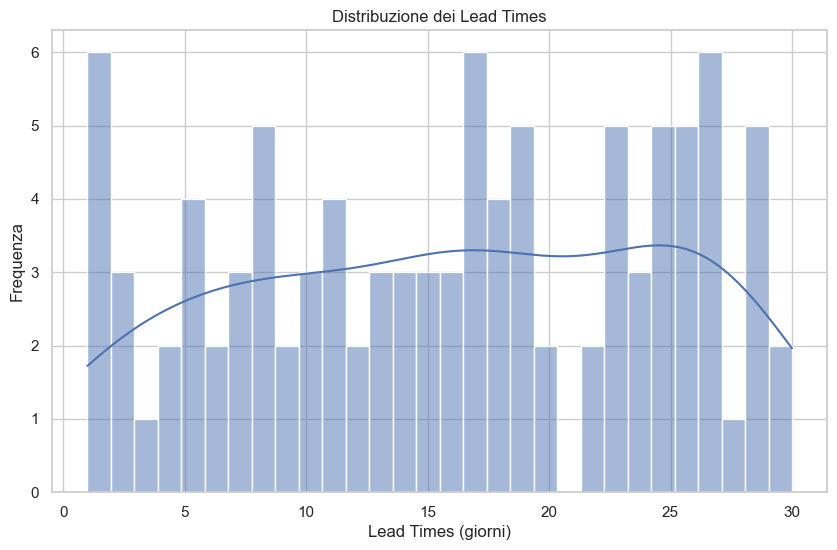

In [80]:
# Distribuzione dei lead times
plt.figure(figsize=(10, 6))
sns.histplot(data['Lead times'], bins=30, kde=True)
plt.title('Distribuzione dei Lead Times')
plt.xlabel('Lead Times (giorni)')
plt.ylabel('Frequenza')
plt.show()

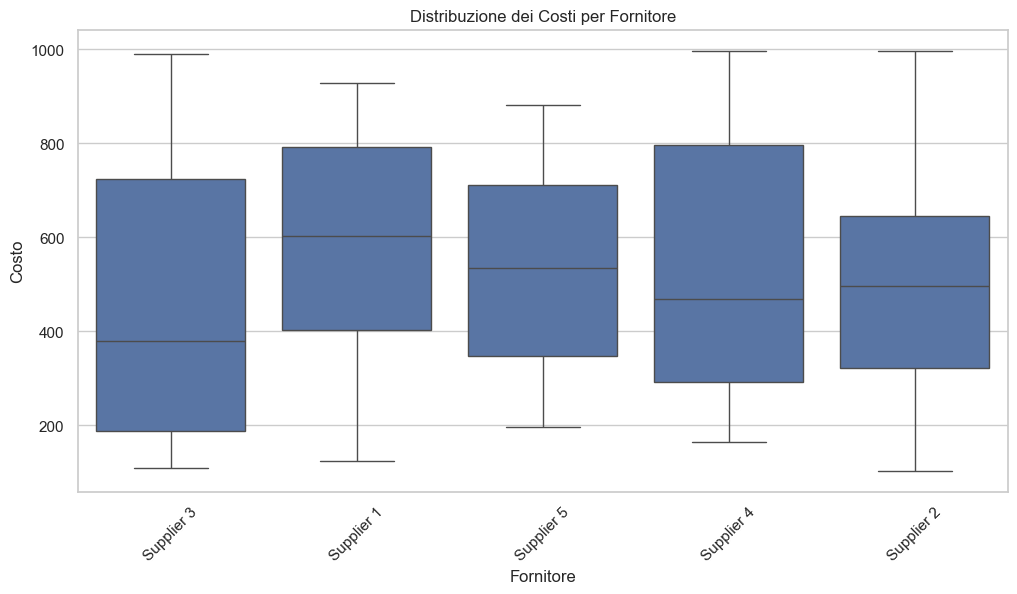

In [81]:
# Distribuzione dei costi per fornitore
plt.figure(figsize=(12, 6))
sns.boxplot(x='Supplier name', y='Costs', data=data)
plt.xticks(rotation=45)
plt.title('Distribuzione dei Costi per Fornitore')
plt.xlabel('Fornitore')
plt.ylabel('Costo')
plt.show()

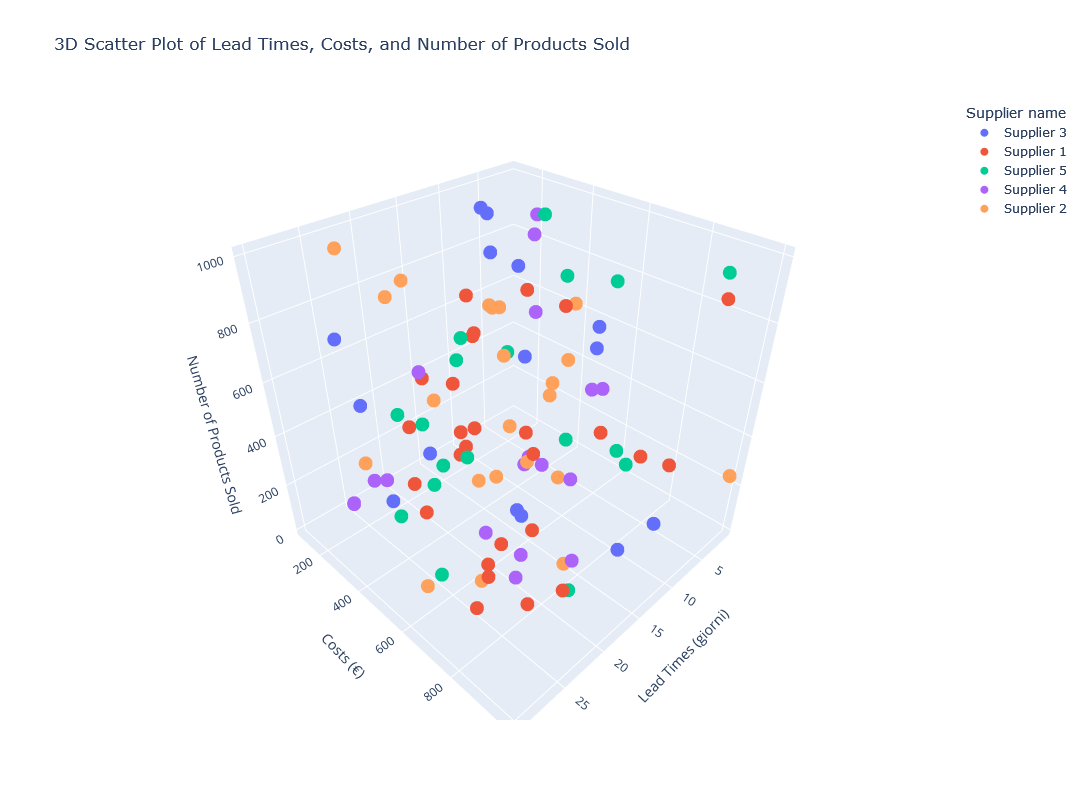

In [99]:
import pandas as pd
import plotly.express as px

# Caricamento del dataset
file_path = "supply_chain_data.csv"  # Modifica il percorso se necessario
data = pd.read_csv(file_path)

# Assicuriamoci che i dati necessari siano numerici
data['Lead times'] = pd.to_numeric(data['Lead times'], errors='coerce')
data['Costs'] = pd.to_numeric(data['Costs'], errors='coerce')
data['Number of products sold'] = pd.to_numeric(data['Number of products sold'], errors='coerce')

# Rimozione dei valori mancanti
data.dropna(subset=['Lead times', 'Costs', 'Number of products sold'], inplace=True)

# Creazione del grafico 3D interattivo
fig = px.scatter_3d(data, x='Lead times', y='Costs', z='Number of products sold', 
                    color='Supplier name',  # Colonna categorica per colorare i punti
                    title="3D Scatter Plot of Lead Times, Costs, and Number of Products Sold",
                    labels={
                        'Lead times': 'Lead Times (giorni)',
                        'Costs': 'Costs (€)',
                        'Number of products sold': 'Number of Products Sold'
                    },
                    width=1200, height=800)  # Dimensioni del grafico
# Visualizzazione del grafico interattivo
fig.show()

h:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



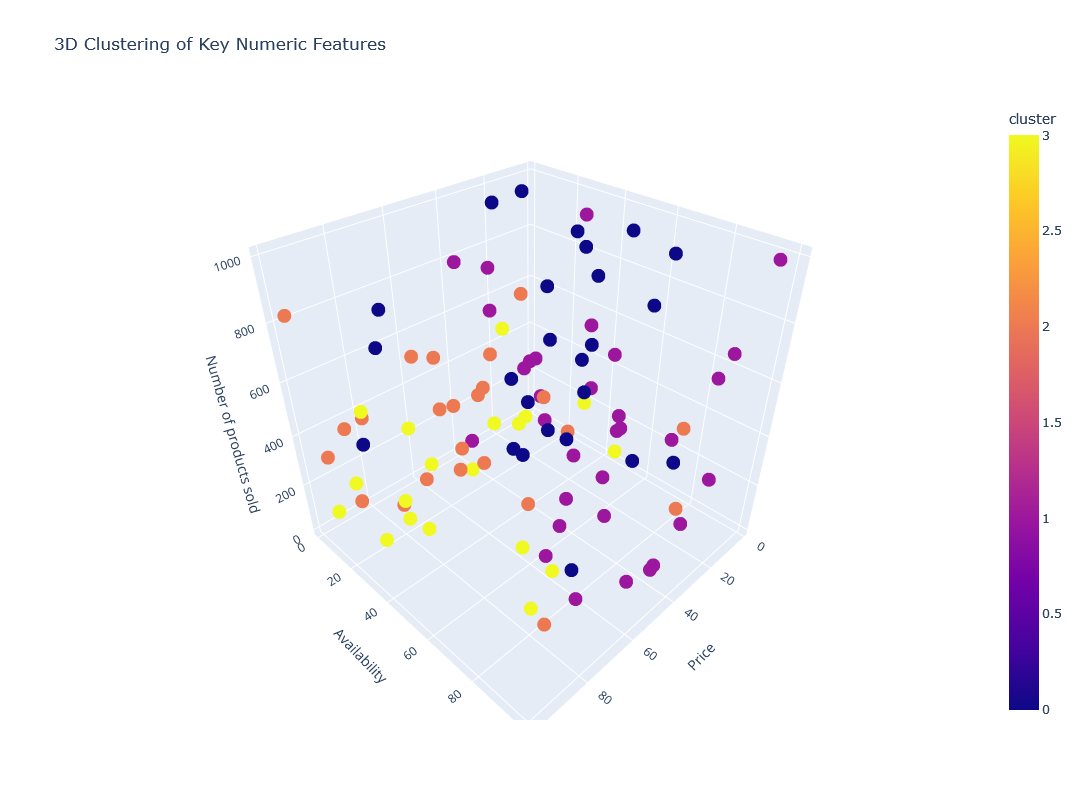

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

# Caricamento del dataset
file_path = "supply_chain_data.csv"  # Modifica il percorso se necessario
data = pd.read_csv(file_path)

# Seleziona solo le colonne numeriche per il clustering e la PCA
numeric_data = data.select_dtypes(include=[np.number])

# Standardizza i dati numerici
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Applica il clustering KMeans solo ai dati numerici
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['cluster'] = clusters  # Aggiunge le etichette dei cluster al dataset originale

# Visualizzazione 3D interattiva dei cluster
fig = px.scatter_3d(data, 
                    x=numeric_data.columns[0], 
                    y=numeric_data.columns[1], 
                    z=numeric_data.columns[2],
                    color='cluster',  # Utilizza la colonna del cluster per colorare i punti
                    title="3D Clustering of Key Numeric Features",
                    labels={
                        numeric_data.columns[0]: numeric_data.columns[0],
                        numeric_data.columns[1]: numeric_data.columns[1],
                        numeric_data.columns[2]: numeric_data.columns[2]
                    },
                    width=1200, height=800)  # Dimensioni del grafico

# Visualizzazione del grafico interattivo
fig.show()

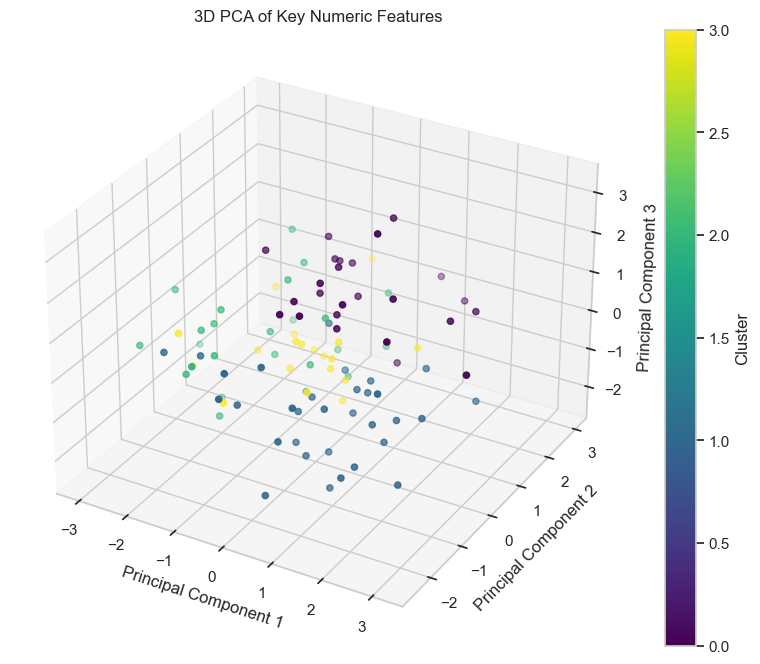

In [84]:
# Apply PCA on numeric data only
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# 3D Visualization of PCA Results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=clusters, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of Key Numeric Features')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [71]:
# Verifica che la colonna 'cluster' esista nel dataset
if 'cluster' in data.columns:
    print("Colonna 'cluster' trovata nel dataset.")
else:
    print("Errore: La colonna 'cluster' non è presente nel dataset.")

# Visualizza i valori unici della colonna 'cluster' per conferma
print("Valori unici nella colonna 'cluster':", data['cluster'].unique())

Colonna 'cluster' trovata nel dataset.
Valori unici nella colonna 'cluster': [2 1 0 3]


In [72]:
# Statistiche di sintesi per ogni cluster
if 'cluster' in data.columns and data['cluster'].notna().any():
    for cluster in data['cluster'].unique():
        cluster_data = data[data['cluster'] == cluster]
        print(f"\nCluster {cluster} Summary:")
        print("Average Lead Times:", cluster_data['Lead times'].mean())
        print("Average Costs:", cluster_data['Costs'].mean())
        print("Average Number of Products Sold:", cluster_data['Number of products sold'].mean())
else:
    print("Errore: La colonna 'cluster' non contiene dati validi per l'analisi.")
# Raccomandazioni
print("\nRaccomandazioni:")
print("- Per i cluster con lead times elevati, considera fornitori alternativi per ridurre i tempi.")
print("- Per i cluster con costi elevati, valuta la negoziazione dei prezzi o una nuova strategia di approvvigionamento.")


Cluster 2 Summary:
Average Lead Times: 20.75
Average Costs: 563.763998357594
Average Number of Products Sold: 483.75

Cluster 1 Summary:
Average Lead Times: 18.28125
Average Costs: 575.7041006186347
Average Number of Products Sold: 406.09375

Cluster 0 Summary:
Average Lead Times: 10.28
Average Costs: 380.32082454519013
Average Number of Products Sold: 620.16

Cluster 3 Summary:
Average Lead Times: 13.473684210526315
Average Costs: 603.3521274634626
Average Number of Products Sold: 315.2631578947368

Raccomandazioni:
- Per i cluster con lead times elevati, considera fornitori alternativi per ridurre i tempi.
- Per i cluster con costi elevati, valuta la negoziazione dei prezzi o una nuova strategia di approvvigionamento.


In [95]:
from IPython.display import display, HTML


html_content = ''' 
<!DOCTYPE html>
<html lang="it">
<head>
    <meta charset="UTF-8">
    <title>Analisi del Progetto - Supply Chain Data Analysis</title>
    <style>
        body { font-family: Arial, sans-serif; line-height: 1.6; color: #333; max-width: 800px; margin: auto; padding: 20px; }
        h1, h2, h3 { color: #0056b3; }
        h1 { text-align: center; }
        code { background-color: #f4f4f4; padding: 2px 4px; border-radius: 4px; }
        .section { margin-bottom: 20px; }
    </style>
</head>
<body>

    <h1>Supply Chain Data Analysis Project</h1>
    
    <div class="section">
        <h2>Introduzione</h2>
        <p>In questo progetto, abbiamo condotto un'analisi dettagliata dei dati di una catena di approvvigionamento per ottimizzare la logistica, ridurre i costi operativi e migliorare le prestazioni della supply chain. I dati analizzati includono informazioni sui tempi di consegna, costi di trasporto, fornitori e volumi di produzione.</p>
    </div>

    <div class="section">
        <h2>Obiettivi dell'Analisi</h2>
        <p>L'obiettivo principale di questo progetto è stato quello di identificare aree di ottimizzazione per la catena di approvvigionamento. In particolare:</p>
        <ul>
            <li>Analizzare la distribuzione dei lead times e valutare le differenze tra fornitori.</li>
            <li>Utilizzare metodi di clustering per suddividere i prodotti e le consegne in gruppi significativi.</li>
            <li>Fornire insight visuali per comprendere meglio le dinamiche dei tempi di consegna, costi e volumi di vendita.</li>
        </ul>
    </div>

    <div class="section">
        <h2>Metodologia</h2>
        <p>Per raggiungere gli obiettivi del progetto, abbiamo seguito i seguenti passaggi:</p>

        <h3>1. Caricamento e Pulizia dei Dati</h3>
        <p>Abbiamo caricato i dati utilizzando <code>pandas</code> e identificato le colonne numeriche e categoriali. Successivamente, i valori mancanti sono stati riempiti utilizzando la mediana per le colonne numeriche e la moda per quelle categoriali, garantendo dati completi per l'analisi.</p>

        <h3>2. Standardizzazione dei Dati</h3>
        <p>Prima di applicare il clustering, abbiamo standardizzato i dati numerici per eliminare qualsiasi effetto di scala. Questo è stato realizzato con <code>StandardScaler</code> di <code>sklearn</code>.</p>

        <h3>3. Clustering K-Means</h3>
        <p>Abbiamo utilizzato l'algoritmo di clustering <code>KMeans</code> con 4 cluster per suddividere i dati in gruppi significativi. Questo ci ha permesso di identificare cluster di prodotti e consegne con caratteristiche simili, come costi, tempi di consegna e volumi di vendita.</p>

        <h3>4. Visualizzazione dei Risultati</h3>
        <p>Le visualizzazioni sono state cruciali per interpretare i risultati e includono:</p>
        <ul>
            <li><b>Distribuzione dei Lead Times</b>: Un istogramma che mostra la distribuzione dei tempi di consegna.</li>
            <li><b>Distribuzione dei Costi per Fornitore</b>: Boxplot per confrontare i costi tra i fornitori.</li>
            <li><b>Visualizzazione 3D dei Cluster</b>: Un grafico tridimensionale per analizzare i cluster in base a lead times, costi e volumi di vendita.</li>
            <li><b>Totale Prodotti Venduti per Cluster</b>: Grafico a barre per visualizzare il numero totale di prodotti venduti per ogni cluster.</li>
            <li><b>Distribuzione Lead Times vs Costs</b>: Un scatter plot per mostrare la correlazione tra tempi di consegna e costi nei diversi cluster.</li>
        </ul>
    </div>

    <div class="section">
        <h2>Risultati e Conclusioni</h2>
        <p>I risultati dell'analisi forniscono insight importanti per ottimizzare la supply chain:</p>
        <ul>
            <li>La distribuzione dei lead times ha mostrato una significativa variabilità, suggerendo la necessità di rivedere alcuni processi logistici.</li>
            <li>I costi dei fornitori variano notevolmente, indicando che alcuni fornitori potrebbero richiedere negoziazioni di prezzo per ridurre i costi complessivi.</li>
            <li>Il clustering ha identificato gruppi di prodotti con caratteristiche simili, permettendo di personalizzare le strategie di gestione per ogni cluster.</li>
            <li>Le visualizzazioni tridimensionali dei cluster forniscono una chiara visione delle relazioni tra tempi di consegna, costi e volumi di vendita, indicando potenziali colli di bottiglia nella catena di approvvigionamento.</li>
        </ul>
        <p>In conclusione, questa analisi supporta il processo decisionale nella gestione della supply chain e suggerisce strategie per migliorare l'efficienza logistica e ridurre i costi operativi.</p>
    </div>

    <div class="section">
        <h2>Possibili Estensioni del Progetto</h2>
        <p>Per migliorare ulteriormente l'analisi, si potrebbero implementare i seguenti metodi:</p>
        <ul>
            <li><b>Analisi Predittiva</b>: Utilizzare modelli di machine learning per prevedere i lead times in base a fattori storici.</li>
            <li><b>Ottimizzazione della Rotta</b>: Implementare algoritmi di ottimizzazione per migliorare l'efficienza delle rotte di trasporto.</li>
            <li><b>Analisi dei Costi Variabili</b>: Monitorare i costi variabili per identificare opportunità di riduzione delle spese operative.</li>
        </ul>
    </div>

</body>
</html>
'''
HTML(html_content)